<a href="https://colab.research.google.com/github/FranklinCncr/TopicosEnComputacionGraficaGrupo/blob/master/TopicosEnComputacionGraficaGrupo/Pr%C3%A1cticas/Kevin%20Salazar/Pr%C3%A1ctica%203/codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Práctica 3**

In [31]:
%%writefile inclinar.cpp
#include <opencv2/opencv.hpp>
#include <bits/stdc++.h>

using namespace cv;
using namespace std;

int main(){
    
    Mat img = imread("coliseo.jpg");

    double inc= tan(45*M_PI/180.0);
    Mat c= (Mat_<double>(2, 3) << 1, inc, -inc*img.size().height/2.0, 0, 1, 0 );
    warpAffine(img, img, c, img.size());

    imwrite("coliseoInclinar.jpg", img);      
    

    return 0;
}

Writing inclinar.cpp


In [33]:
!g++ inclinar.cpp `pkg-config --cflags --libs opencv` -o t; ./t;

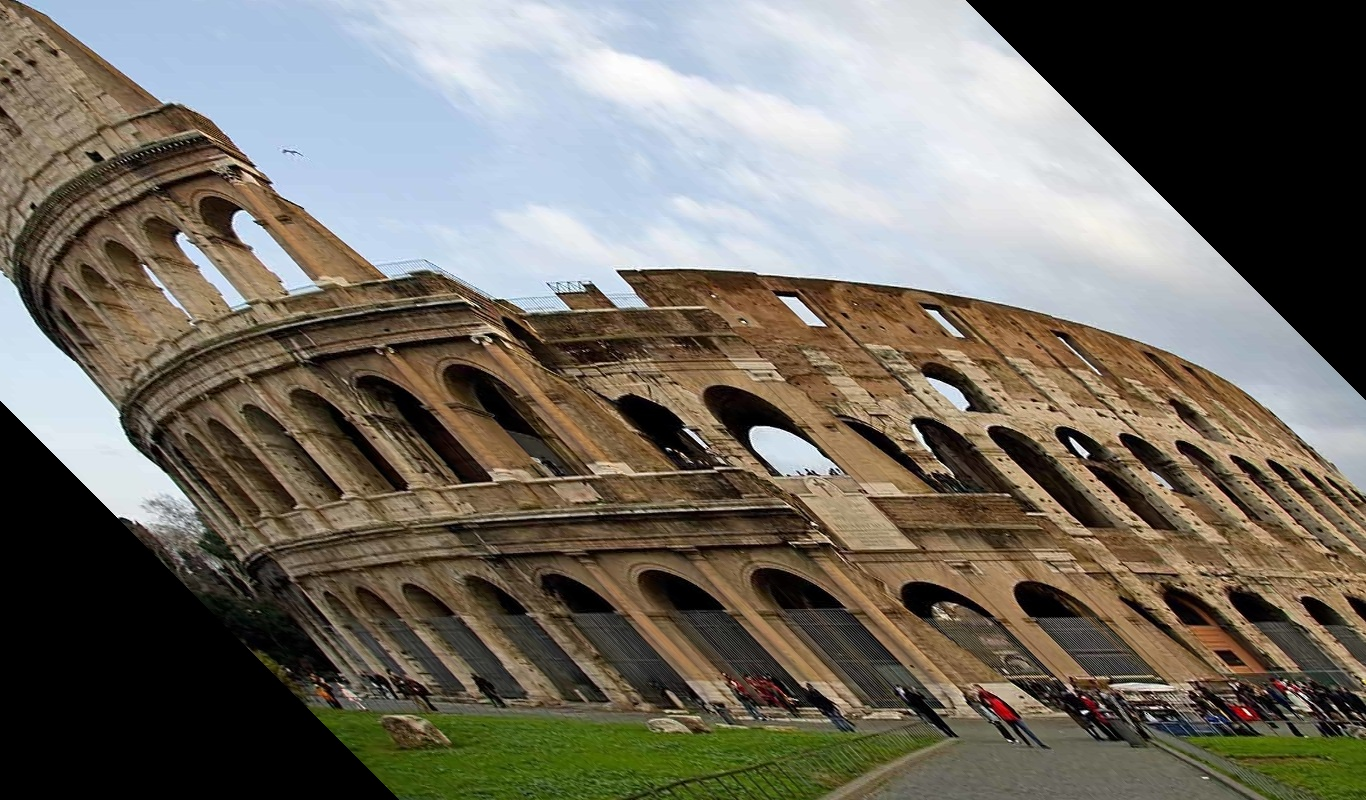

In [34]:
from IPython.display import Image, display
display(Image('coliseoInclinar.jpg', height=300))

In [85]:
%%writefile inclinarInversa.cpp
#include <opencv2/opencv.hpp>
#include <bits/stdc++.h>

using namespace cv;
using namespace std;

int main(){
    
    Mat img = imread("coliseo.jpg");

    double inc= tan(45*M_PI/180.0);
    Mat c= (Mat_<double>(2, 3) << 1, inc, -inc*img.size().height/2.0, 0, 1, 0 );
    warpAffine(img, img, c, img.size());
    warpAffine(img, img, c, img.size(), WARP_INVERSE_MAP);

    imwrite("coliseoInclinarInversa.jpg", img);      
    

    return 0;
}


Writing inclinarInversa.cpp


In [86]:
!g++ inclinarInversa.cpp `pkg-config --cflags --libs opencv` -o t; ./t;

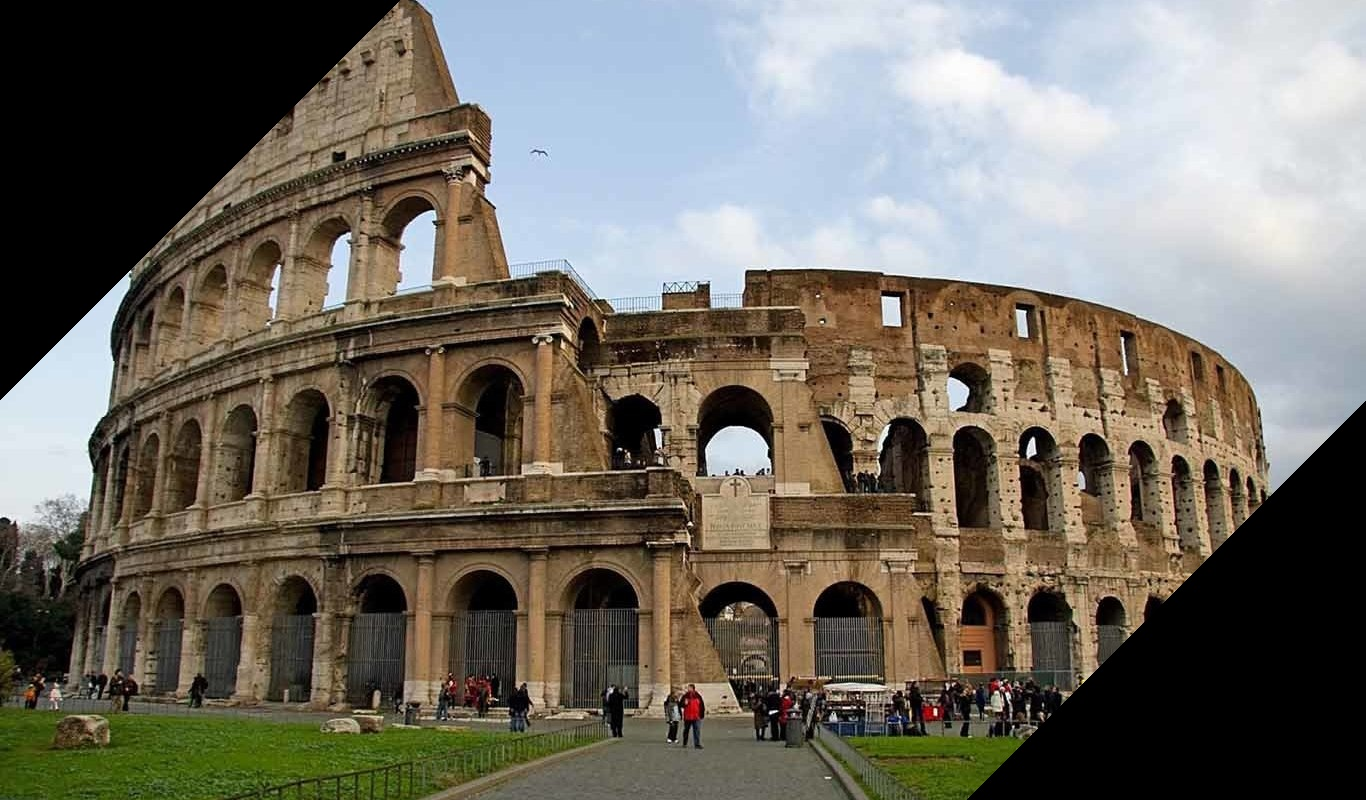

In [87]:
from IPython.display import Image, display
display(Image('coliseoInclinarInversa.jpg', height=300))

In [3]:
%cd '/content/drive/My Drive/topicos en grafica/practica 3'

/content/drive/My Drive/topicos en grafica/practica 3


In [76]:
%%writefile resizeNearest.cpp
#include <opencv2/opencv.hpp>
#include <bits/stdc++.h>

using namespace cv;
using namespace std;

int main(){
    
    Mat img = imread("coliseo.jpg");

    cv::resize(img, img, Size(), 0.5, 0.5, INTER_NEAREST);

    //flip (img, img, 1);

    imwrite("coliseoResizeNearest.jpg", img);      
    

    return 0;
}

Writing resizeNearest.cpp


In [77]:
!g++ resizeNearest.cpp `pkg-config --cflags --libs opencv` -o t; ./t;

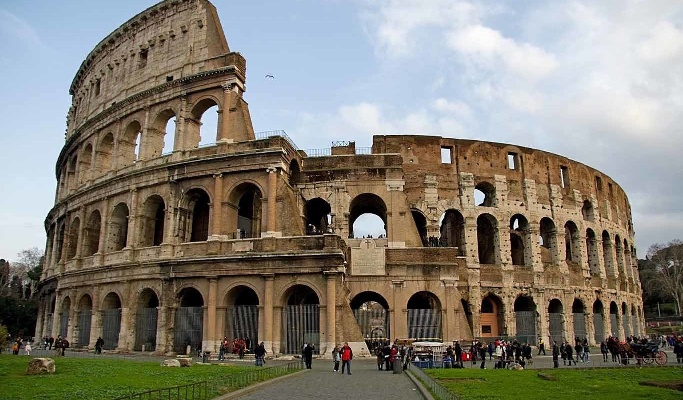

In [78]:
from IPython.display import Image, display
display(Image('coliseoResizeNearest.jpg', height=300))

In [79]:
%%writefile resizeLinear.cpp
#include <opencv2/opencv.hpp>
#include <bits/stdc++.h>

using namespace cv;
using namespace std;

int main(){
    
    Mat img = imread("coliseo.jpg");

    cv::resize(img, img, Size(), 0.5, 0.5, INTER_LINEAR);

    //flip (img, img, 1);

    imwrite("coliseoResizeLinear.jpg", img);      
    

    return 0;
}

Writing resizeLinear.cpp


In [80]:
!g++ resizeLinear.cpp `pkg-config --cflags --libs opencv` -o t; ./t;

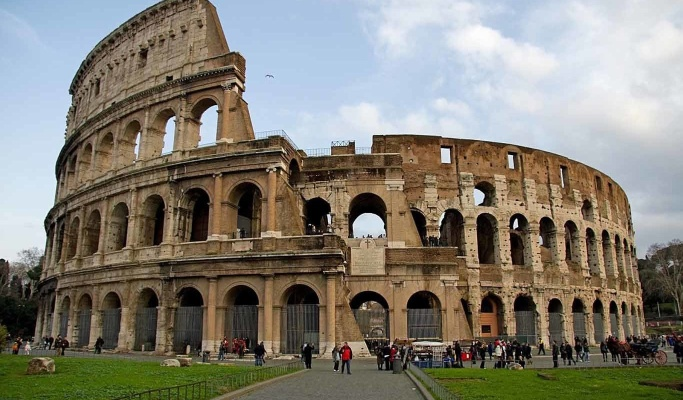

In [81]:
from IPython.display import Image, display
display(Image('coliseoResizeLinear.jpg', height=300))

In [82]:
%%writefile flip.cpp
#include <opencv2/opencv.hpp>
#include <bits/stdc++.h>

using namespace cv;
using namespace std;

int main(){
    
    Mat img = imread("coliseo.jpg");

    flip (img, img, 1);

    imwrite("coliseoFlip.jpg", img);      
    

    return 0;
}

Writing flip.cpp


In [83]:
!g++ flip.cpp `pkg-config --cflags --libs opencv` -o t; ./t;

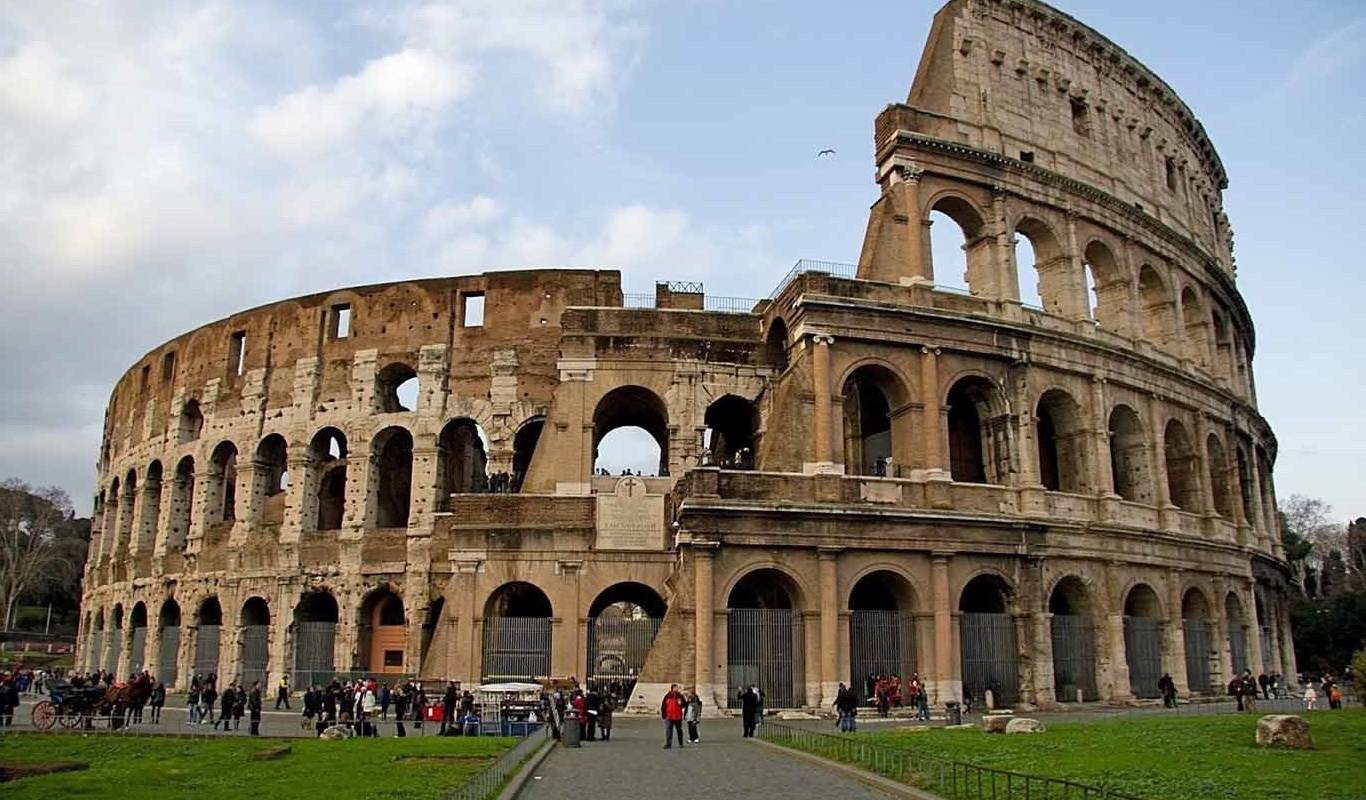

In [84]:
from IPython.display import Image, display
display(Image('coliseoFlip.jpg', height=300))

In [28]:
%%writefile rotar.cpp
#include <opencv2/opencv.hpp>
#include <bits/stdc++.h>

using namespace cv;
using namespace std;

void Rotar (Mat imagen, Mat &salida, double angulo, double escala= 1)
{
  double w= imagen.size().width, h= imagen.size().height;
 
  double sa= sin(angulo*M_PI/180), ca= cos(angulo*M_PI/180);
 
  double cx= -w/2*ca-h/2*sa, cy= w/2*sa-h/2*ca;
 
  sa= fabs(sa); ca= fabs(ca);
 
  Size tam((w*ca+h*sa)*escala, (h*ca+w*sa)*escala);
 
  Mat M= getRotationMatrix2D(Point2f(0,0), angulo, escala);
 
  M.at<double>(0,2)= tam.width/2+cx*escala;
  M.at<double>(1,2)= tam.height/2+cy*escala;
 
  warpAffine(imagen, salida, M, tam);
}

int main(){
    
    Mat img = imread("coliseo.jpg");

    Mat salida;
    double angulo = 45, escala=1;

    Rotar (img, salida, angulo, escala);

    imwrite("coliseoRotar.jpg", salida);      
    

    return 0;
}

Overwriting rotar.cpp


In [29]:
!g++ rotar.cpp `pkg-config --cflags --libs opencv` -o t; ./t;

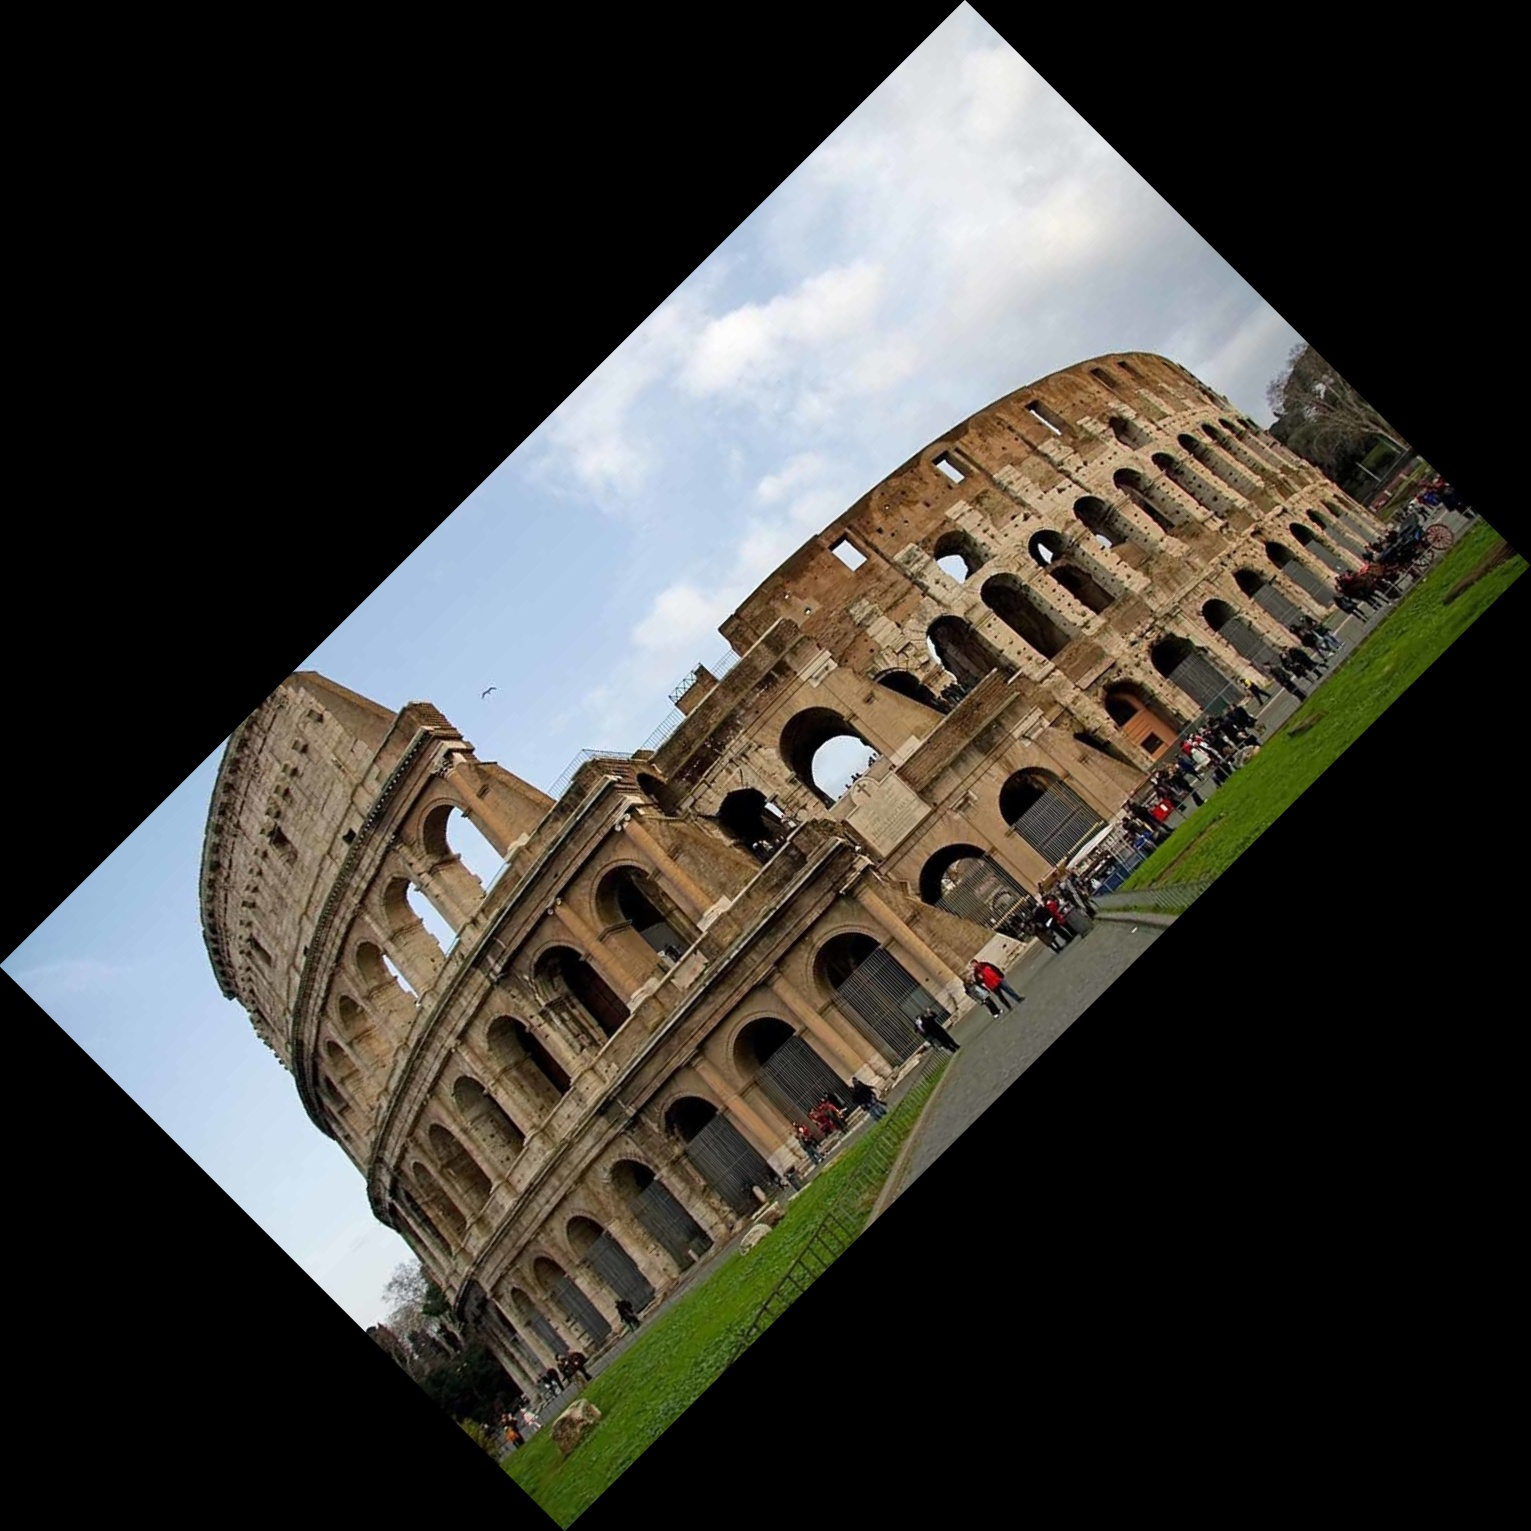

In [30]:
from IPython.display import Image, display
display(Image('coliseoRotar.jpg', height=300))

In [58]:
%%writefile transformarConCoeficientes.cpp
#include <opencv2/opencv.hpp>
#include <bits/stdc++.h>

using namespace cv;
using namespace std;

int main(){
    
    Mat img = imread("coliseo.jpg");

    Mat pt1(1, 3, CV_32FC2); // Puntos en el origen
    pt1.at<Vec2f>(0,0)= Vec2f(0, 0); // Rellenar los tres puntos
    pt1.at<Vec2f>(0,1)= Vec2f(100, 0);
    pt1.at<Vec2f>(0,2)= Vec2f(100, 100);

    Mat pt2(1, 3, CV_32FC2); // Puntos en el destino
    pt2.at<Vec2f>(0,0)= Vec2f(10, 20); // Rellenar los tres puntos
    pt2.at<Vec2f>(0,1)= Vec2f(80, 40);
    pt2.at<Vec2f>(0,2)= Vec2f(20, 70);

    Mat c= getAffineTransform(pt1, pt2);

    warpAffine(img, img, c, img.size());

    imwrite("coliseoTransformarConCoeficientes.jpg", img);      
    

    return 0;
}

Overwriting transformarConCoeficientes.cpp


In [59]:
!g++ transformarConCoeficientes.cpp `pkg-config --cflags --libs opencv` -o t; ./t;

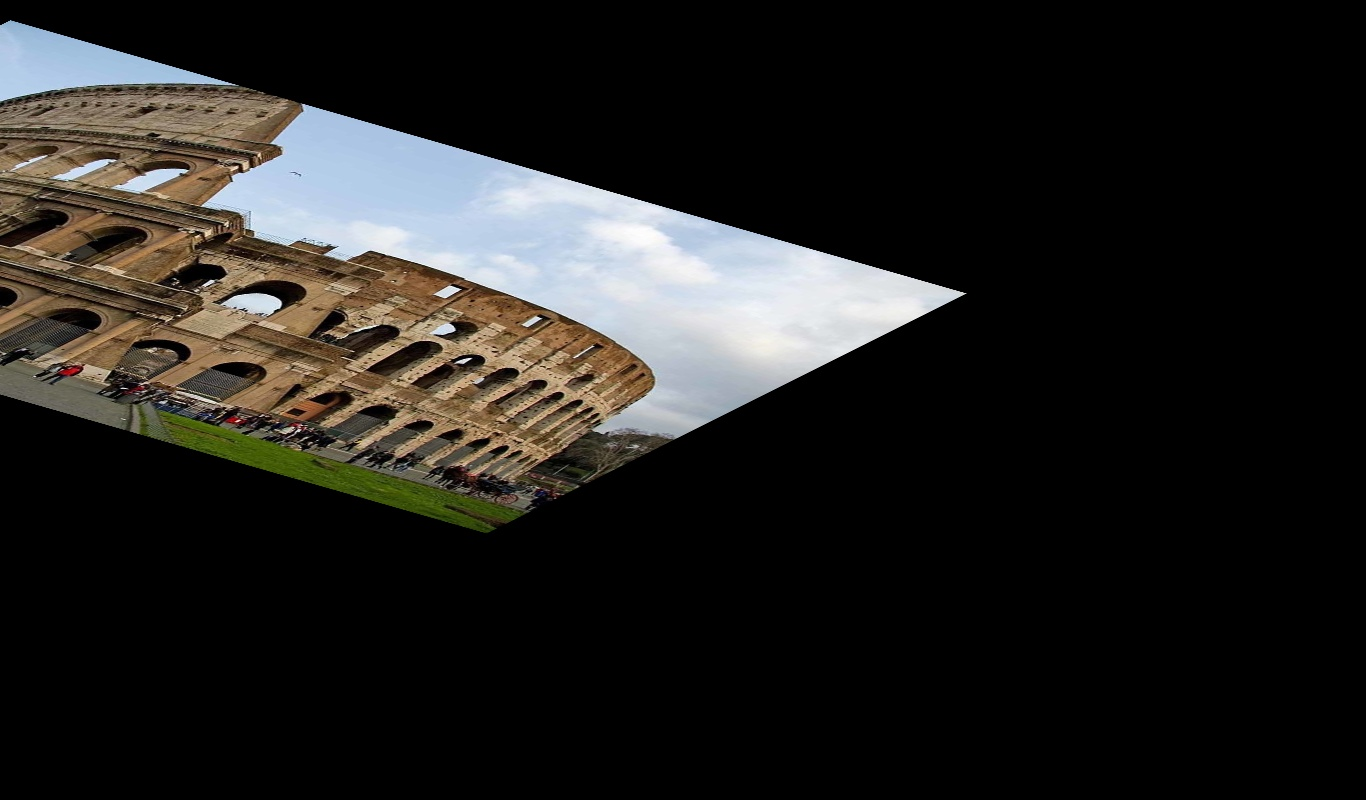

In [60]:
from IPython.display import Image, display
display(Image('coliseoTransformarConCoeficientes.jpg', height=300))